<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap08_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

import sklearn

%precision 3





'%.3f'

In [32]:
#決定木
import requests, zipfile
import io
url='http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res=requests.get(url).content

mushroom=pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

mushroom.columns=['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                  'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                  'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                  'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                  'ring_number','ring_type','spore_sprint_color','population','habitat']

mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_sprint_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損値の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損値の数:0


In [34]:
mushroom_dummy=pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [35]:
mushroom_dummy['flg']=mushroom['classes'].map(lambda x:1 if x=='p' else 0)

In [36]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [37]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [38]:
-(0.5*np.log2(0.5)+0.5*np.log2(0.5))

1.0

In [39]:
-(0.001*np.log2(0.001)+0.999*np.log2(0.999))

0.011407757737461138

In [40]:
def calc_entropy(p):
  return -(p*np.log2(p)+ (1-p)*np.log2(1-p))

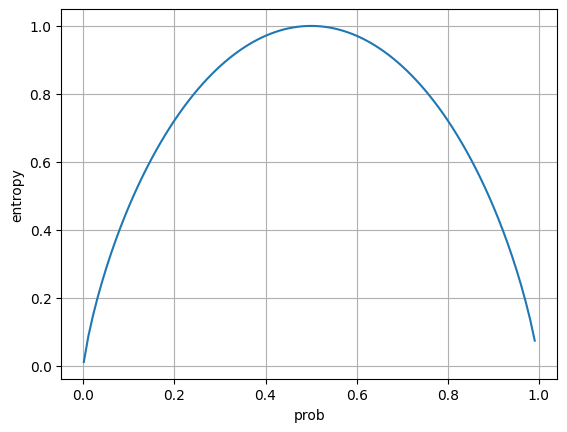

In [41]:
#pの値を0.001～0.999まで0.01刻み
p=np.arange(0.001,0.999,0.01)

plt.plot(p,calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [42]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [43]:
entropy_init=-(0.518*np.log2(0.518)+0.482*np.log2(0.482))
print('毒キノコデータのエントロピーの初期値:{:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値:0.999


In [44]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [45]:
#cap_colorがcでない場合のエントロピー
p1=4176/(4176+3904)
p2=1-p1

entropy_c0=-(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0:{:.3f}'.format(entropy_c0))

entropy_c0:0.999


In [46]:
p1=32/(32+12)
p2=1-p1

entropy_c1=-(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1:{:.3f}'.format(entropy_c1))

entropy_c1:0.845


In [47]:
entropy_after=(4176+3904)/8124*entropy_c0+(32+12)/8124*entropy_c1
print('データ分割後の平均エントロピー:{:.3f}'.format(entropy_after))

データ分割後の平均エントロピー:0.998


In [48]:
print('変数cap_colorの分割によって得られる情報利得:{:.3f}'.format(entropy_init-entropy_after))

変数cap_colorの分割によって得られる情報利得:0.001


In [49]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [50]:
#grill_colorがbでない場合のエントロピー
p1=4208/(4208+2188)
p2=1-p1

entropy_b0=-(p1*np.log2(p1)+p2*np.log2(p2))

#grill_colorがbである場合のエントロピー
p1=0/(0+1728)
p2=1-p1

entropy_b1=-(p2*np.log2(p2))

entropy_after=(4208+2188)/8124*entropy_b0+(0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得:{:.3f}'.format(entropy_init-entropy_after))


変数gill_colorの分割によって得られる情報利得:0.269


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X=mushroom_dummy.drop('flg',axis=1)
y=mushroom_dummy['flg']

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

model=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.883
正解率(test):0.894


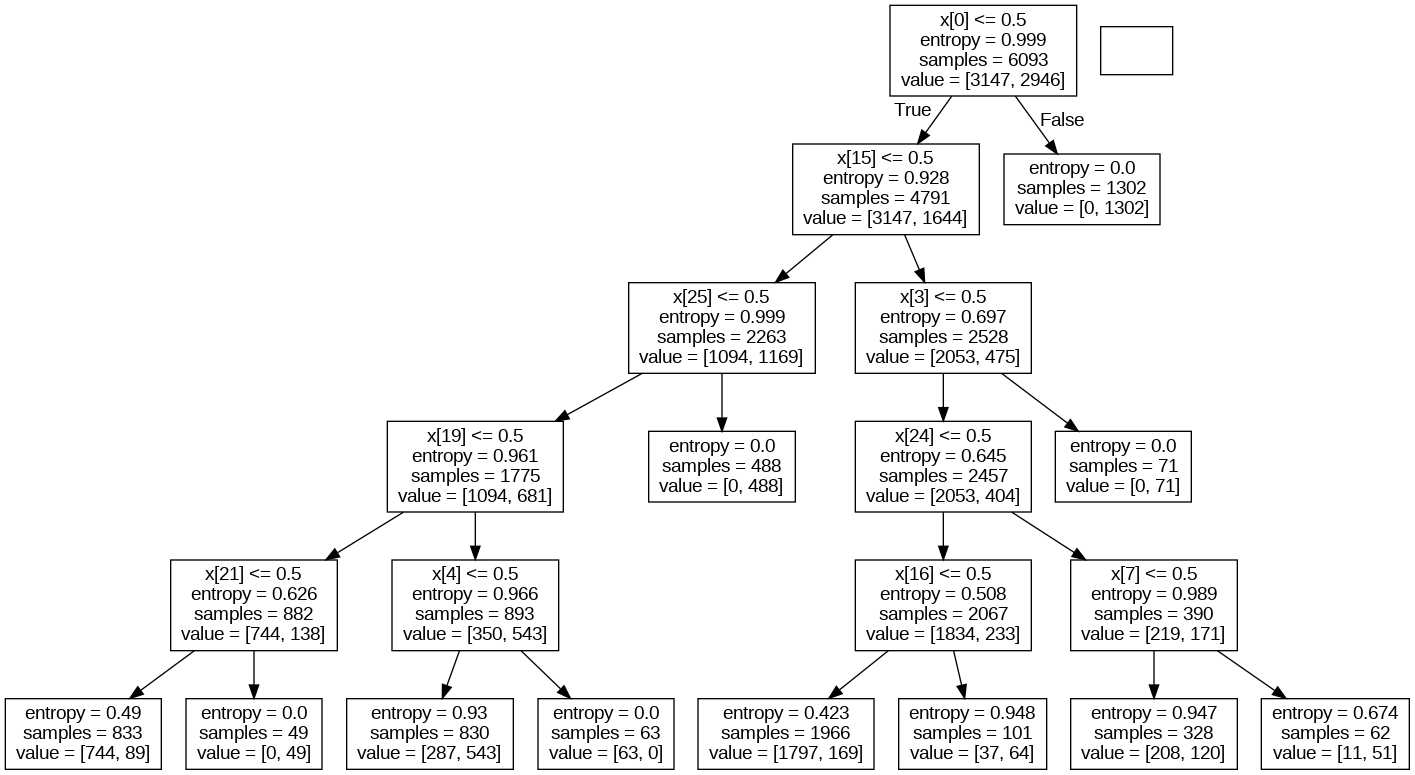

In [52]:
#参考プログラム
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [53]:
#練習問題8-5
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X2 = cancer.data

y2 =cancer.target

X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,random_state=0)

model=DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)
model.fit(X2_train,y2_train)

print('正解率(train):{:.3f}'.format(model.score(X2_train,y2_train)))
print('正解率(test):{:.3f}'.format(model.score(X2_test,y2_test)))


正解率(train):1.000
正解率(test):0.958


In [54]:
#サポートベクタ―マシン
from sklearn.svm import LinearSVC

X2_train, X2_test, y2_train, y2_test=train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

model=LinearSVC()
model.fit(X2_train, y2_train)

print('正解率(train):{:.3f}'.format(model.score(X2_train,y2_train)))
print('正解率(test):{:.3f}'.format(model.score(X2_test,y2_test)))


正解率(train):0.930
正解率(test):0.930


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
from sklearn.preprocessing import StandardScaler

X2_train, X2_test, y2_train, y2_test=train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

sc=StandardScaler()
sc.fit(X2_train)
X2_train_std=sc.transform(X2_train)
X2_test_std=sc.transform(X2_test)

model=LinearSVC()
model.fit(X2_train_std, y2_train)

print('正解率(train):{:.3f}'.format(model.score(X2_train_std,y2_train)))
print('正解率(test):{:.3f}'.format(model.score(X2_test_std,y2_test)))

正解率(train):0.993
正解率(test):0.951


In [56]:
#練習問題8-8
from sklearn.svm import SVC
sc=StandardScaler()
sc.fit(X2_train)
X2_train_std=sc.transform(X2_train)
X2_test_std=sc.transform(X2_test)

model=SVC(kernel='rbf', random_state=0, C=2)
model.fit(X2_train_std, y2_train)

print('正解率(train):{:.3f}'.format(model.score(X2_train_std,y2_train)))
print('正解率(test):{:.3f}'.format(model.score(X2_test_std,y2_test)))

正解率(train):0.995
正解率(test):0.958


In [57]:
#8-5をRandomForestClassifierに変更
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))


正解率(train):0.887
正解率(test):0.895


In [58]:
#総合問題8-1
#回帰…連続的な値の予測する手法
#分類…カテゴリやクラスに対する予測手法
#教師あり学習…機械学習の一種で、コンピューターに対してラベルと呼ばれる正解データを提供することで学習させる手法
#参考文献[https://www.softbank.jp/biz/solutions/generative-ai/ai-glossary/supervised-learning/]

#重回帰分析…重回帰分析は、2つ以上の説明変数が目的変数に与える影響度合いを分析する手法
#参考文献[https://data-viz-lab.com/multiple-regression-analysis#1-1]

#ロジスティクス回帰分析…単純パーセプトロンの活性化関数にシグモイド関数を使用したモデル
#求める目的関数は確率(0~1)になる
#決定木…Yes/Noで答えられる質問で構成された階層的な木構造を学習するアルゴリズム
#k-NN法…クラス分類問題を解くことができるアルゴリズム
#教師データからモデルのパラメータを推測せず、学習データをベクトル空間上にプロットし、未知のデータが得られたら、そこから距離が近い順に任意のk個を取得し、多数決でデータが属するクラスを推定
#SVM…パーセプトロンにカーネル関数とマージン最大化を加えて次元を増やすことで、非線形の分割を線形に分割できるようにするモデル
#クラス分類と回帰が扱える
#参考文献[https://ai-kenkyujo.com/artificial-intelligence/algorithm/kyoushiari/]

#正則化…データのスケールを統一することで、異なる尺度の特徴量を同等に扱えるようにする
#参考文献[https://qiita.com/piaxv95/items/b908b90b8751a5cf3756]

#リッジ回帰…線形回帰モデルに対して正則化項を加えることで、過学習を防ぎ、モデルの汎化能力を高める
#回帰係数の二乗和にペナルティを課すことにより、係数の絶対値を小さく抑え、モデルが訓練データに過剰に適合するのを防ぐ
#説明変数間に強い相関が存在する多重共線性の問題がある場合に有効
#ラッソ回帰…不要な説明変数の係数をゼロにすることで変数選択を行い、モデルの解釈性を高める
#予測精度を最優先する場合や、説明変数間に強い相関がある場合にはリッジ回帰が適する
#参考文献[https://reinforz.co.jp/bizmedia/27434/]

#エントロピー…情報源の平均情報量でどのくらいの情報を持っているかの指標
#参考文献[https://qiita.com/hirowatari-s/items/f624995514fff93f21ae]

#情報利得…データ分割の前後を比較してどれだけ綺麗にデータを分割できたか
#参考文献[https://dev.classmethod.jp/articles/2017ad_20171211_dt-2/#sec4]

#ノーフリーランチ…データから予測モデルを選ぶ（フィッティングする）際、予測モデルの候補が多すぎると、
#データをどれほどたくさん集めたりモデルの選び方をどのように工夫したりしても、選ばれたモデルの精度が非常に悪くなること
#参考文献[https://qiita.com/tnukui/items/d9727c0841248af4f3ba]

In [59]:
#総合問題8-2
from sklearn.datasets import load_iris
iris = load_breast_cancer()

X3 = iris.data

y3 = iris.target

X3_train, X3_test, y3_train, y3_test=train_test_split(X3,y3,random_state=0)

model=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X3_train,y3_train)

print('正解率(train):{:.3f}'.format(model.score(X3_train,y3_train)))
print('正解率(test):{:.3f}'.format(model.score(X3_test,y3_test)))

正解率(train):0.993
正解率(test):0.944


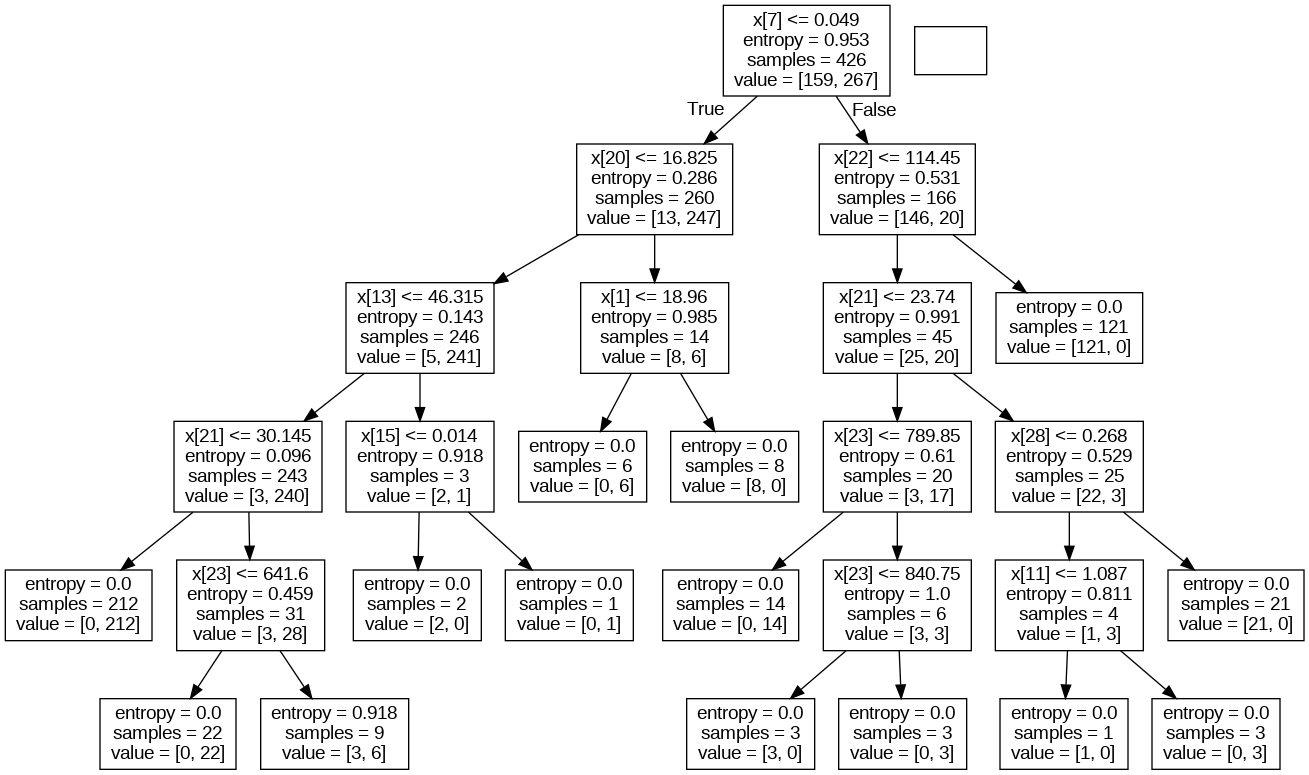

In [60]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())